In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
from sklearn import datasets

# Load the IRIS dataset
iris = datasets.load_iris()

# Features (first 5 rows)
print("Features:\n", iris.data[:5])

# Labels (first 5 labels)
print("Labels:\n", iris.target[:5])

# Target names
print("Target Names:\n", iris.target_names)


Features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels:
 [0 0 0 0 0]
Target Names:
 ['setosa' 'versicolor' 'virginica']


Linear Kernel SVM Accuracy: 1.0


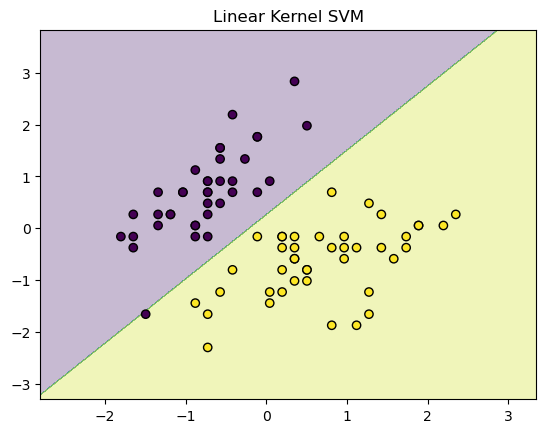

RBF Kernel SVM (Good Params) Accuracy: 1.0


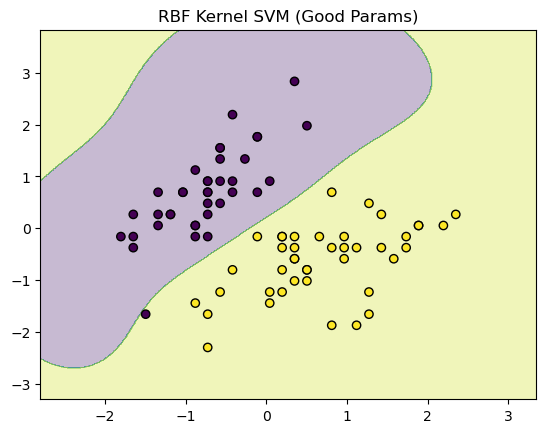

RBF Kernel SVM (Bad Params) Accuracy: 1.0


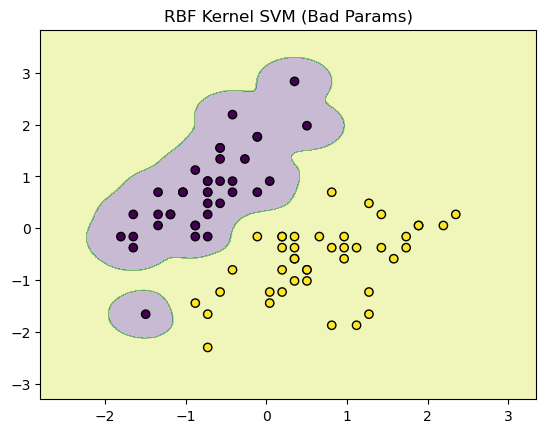

In [2]:
# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only take the first two features for simplicity
y = iris.target

# Only use two classes for binary classification (setosa and versicolor)
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Helper function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Train and evaluate SVM with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear Kernel SVM Accuracy: {accuracy_linear}")
plot_decision_boundary(svm_linear, X_train, y_train, 'Linear Kernel SVM')

# Train and evaluate SVM with a RBF kernel (good classification)
svm_rbf_good = SVC(kernel='rbf', gamma=0.7)
svm_rbf_good.fit(X_train, y_train)
y_pred_rbf_good = svm_rbf_good.predict(X_test)
accuracy_rbf_good = accuracy_score(y_test, y_pred_rbf_good)
print(f"RBF Kernel SVM (Good Params) Accuracy: {accuracy_rbf_good}")
plot_decision_boundary(svm_rbf_good, X_train, y_train, 'RBF Kernel SVM (Good Params)')

# Train and evaluate SVM with a RBF kernel (bad classification)
svm_rbf_bad = SVC(kernel='rbf', gamma=10)
svm_rbf_bad.fit(X_train, y_train)
y_pred_rbf_bad = svm_rbf_bad.predict(X_test)
accuracy_rbf_bad = accuracy_score(y_test, y_pred_rbf_bad)
print(f"RBF Kernel SVM (Bad Params) Accuracy: {accuracy_rbf_bad}")
plot_decision_boundary(svm_rbf_bad, X_train, y_train, 'RBF Kernel SVM (Bad Params)')

Linear Kernel SVM Accuracy: 0.9666666666666667
RBF Kernel SVM (Good Params) Accuracy: 1.0
RBF Kernel SVM (Bad Params) Accuracy: 0.9666666666666667


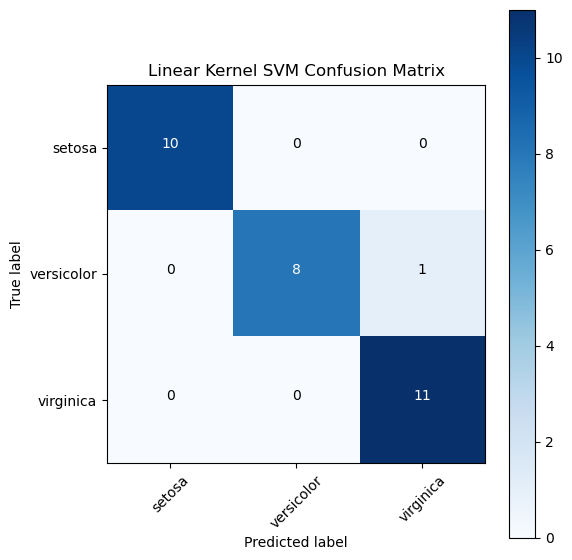

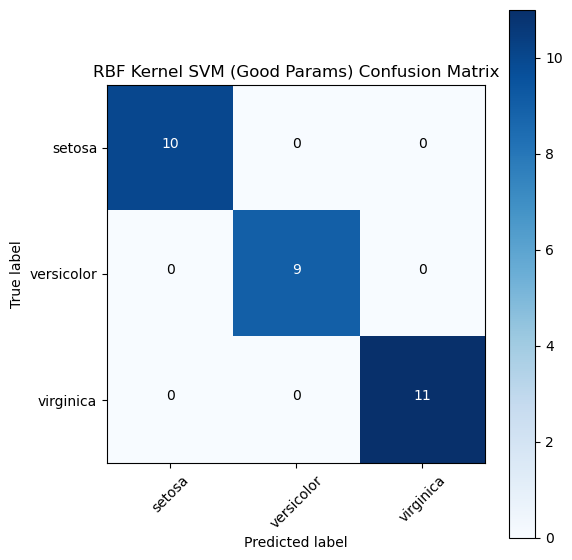

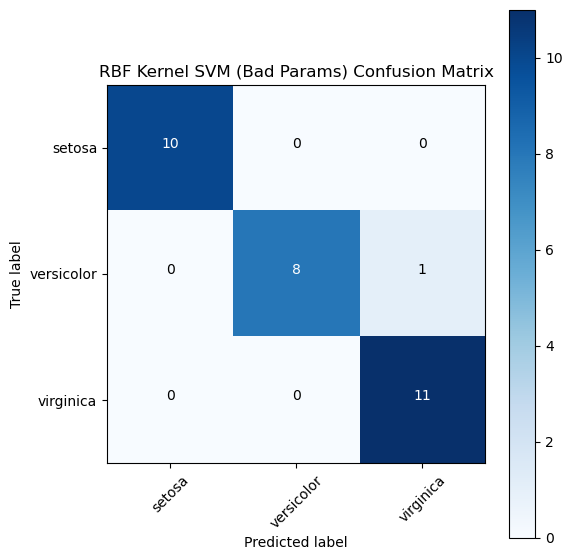

Linear Kernel SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

RBF Kernel SVM (Good Params) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

RBF Kernel SVM (Bad Params) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data  # Use all four features
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate SVM with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear Kernel SVM Accuracy: {accuracy_linear}")

# Train and evaluate SVM with a RBF kernel (good classification)
svm_rbf_good = SVC(kernel='rbf', gamma=0.7)
svm_rbf_good.fit(X_train, y_train)
y_pred_rbf_good = svm_rbf_good.predict(X_test)
accuracy_rbf_good = accuracy_score(y_test, y_pred_rbf_good)
print(f"RBF Kernel SVM (Good Params) Accuracy: {accuracy_rbf_good}")

# Train and evaluate SVM with a RBF kernel (bad classification)
svm_rbf_bad = SVC(kernel='rbf', gamma=10)
svm_rbf_bad.fit(X_train, y_train)
y_pred_rbf_bad = svm_rbf_bad.predict(X_test)
accuracy_rbf_bad = accuracy_score(y_test, y_pred_rbf_bad)
print(f"RBF Kernel SVM (Bad Params) Accuracy: {accuracy_rbf_bad}")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_linear, 'Linear Kernel SVM Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_rbf_good, 'RBF Kernel SVM (Good Params) Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_rbf_bad, 'RBF Kernel SVM (Bad Params) Confusion Matrix')

# Print classification reports
print("Linear Kernel SVM Classification Report:")
print(classification_report(y_test, y_pred_linear))

print("RBF Kernel SVM (Good Params) Classification Report:")
print(classification_report(y_test, y_pred_rbf_good))

print("RBF Kernel SVM (Bad Params) Classification Report:")
print(classification_report(y_test, y_pred_rbf_bad))

Correlation between various datapoints of the IRIS dataset, basically a statistical analysis

Descriptive Statistics:
Feature             Mean      Std Dev   Min       25%       50%       75%       Max       
sepal length (cm)   5.84      0.83      4.30      5.10      5.80      6.40      7.90      
sepal width (cm)    3.06      0.43      2.00      2.80      3.00      3.30      4.40      
petal length (cm)   3.76      1.76      1.00      1.60      4.35      5.10      6.90      
petal width (cm)    1.20      0.76      0.10      0.30      1.30      1.80      2.50      


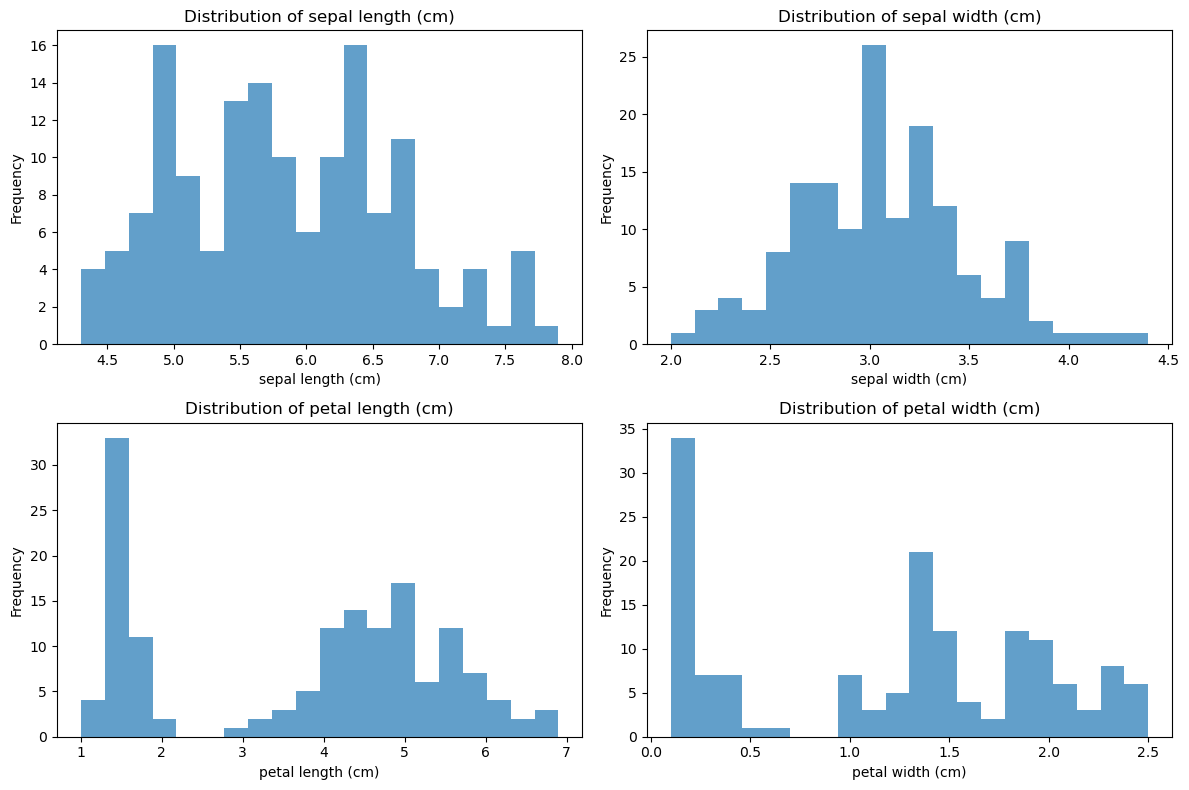

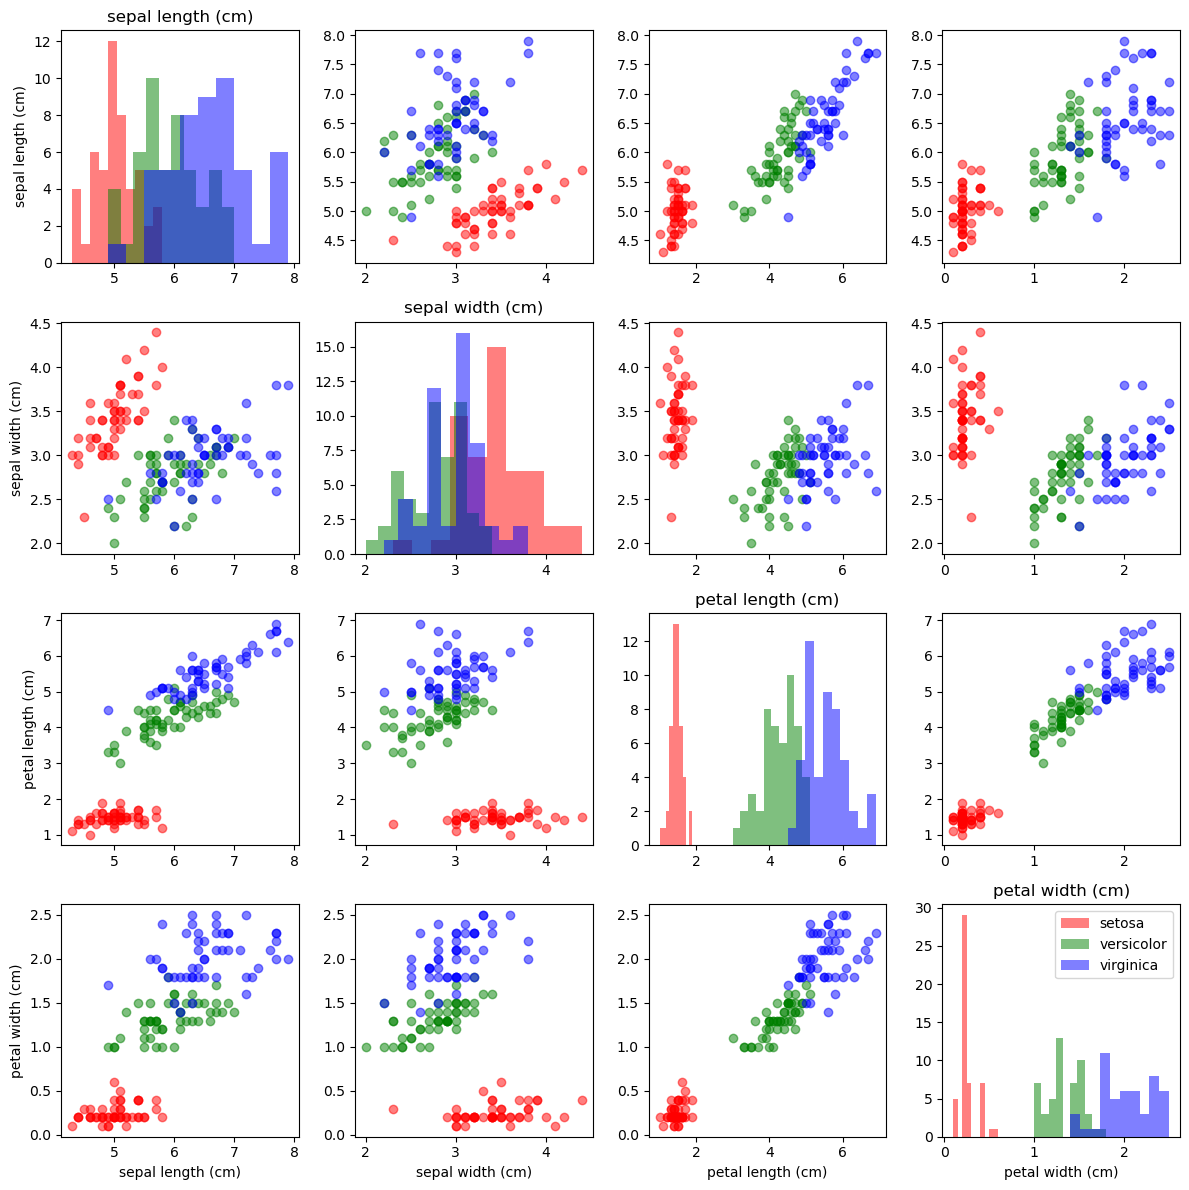

<Figure size 800x600 with 0 Axes>

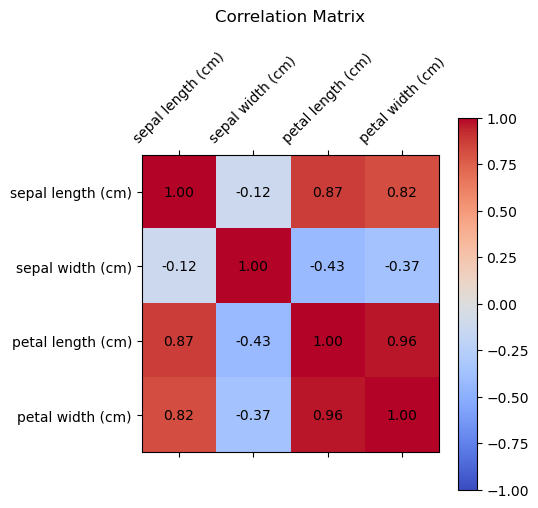

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data  # Use all four features
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute descriptive statistics manually , 
#Descriptive statistics for each feature, including mean, standard deviation, min, max, and quartiles.
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
min_val = np.min(X, axis=0)
max_val = np.max(X, axis=0)
q25 = np.percentile(X, 25, axis=0)
q50 = np.percentile(X, 50, axis=0)
q75 = np.percentile(X, 75, axis=0)

print("Descriptive Statistics:")
print(f"{'Feature':<20}{'Mean':<10}{'Std Dev':<10}{'Min':<10}{'25%':<10}{'50%':<10}{'75%':<10}{'Max':<10}")
for i, feature in enumerate(feature_names):
    print(f"{feature:<20}{mean[i]:<10.2f}{std[i]:<10.2f}{min_val[i]:<10.2f}{q25[i]:<10.2f}{q50[i]:<10.2f}{q75[i]:<10.2f}{max_val[i]:<10.2f}")

# Visualize the distribution of each feature, Plotting histograms with kernel density estimates (KDE) for each feature to visualize their distributions.
def plot_feature_distributions(X, feature_names):
    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(feature_names):
        plt.subplot(2, 2, i + 1)
        plt.hist(X[:, i], bins=20, alpha=0.7, label=feature)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Visualize pairplot to see relationships between features
#visualize the relationships between features, colored by the target class.
def plot_pairplot(X, y, feature_names, target_names):
    plt.figure(figsize=(12, 12))
    colors = ['r', 'g', 'b']
    target_classes = np.unique(y)
    for i in range(len(feature_names)):
        for j in range(len(feature_names)):
            plt.subplot(len(feature_names), len(feature_names), i * len(feature_names) + j + 1)
            if i == j:
                for target_class, color in zip(target_classes, colors):
                    plt.hist(X[y == target_class, i], 
                             bins=10, alpha=0.5, color=color, label=target_names[target_class])
                plt.title(feature_names[i])
            else:
                for target_class, color in zip(target_classes, colors):
                    plt.scatter(X[y == target_class, j], 
                                X[y == target_class, i], 
                                alpha=0.5, color=color, label=target_names[target_class])
            if i == len(feature_names) - 1:
                plt.xlabel(feature_names[j])
            if j == 0:
                plt.ylabel(feature_names[i])
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper right')
    plt.tight_layout()
    plt.show()

# Visualize correlation matrix
def plot_correlation_matrix(X, feature_names):
    correlation_matrix = np.corrcoef(X.T)
    plt.figure(figsize=(8, 6))
    cax = plt.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(cax)
    plt.title('Correlation Matrix', pad=20)
    plt.xticks(range(len(feature_names)), feature_names, rotation=45)
    plt.yticks(range(len(feature_names)), feature_names)
    for (i, j), val in np.ndenumerate(correlation_matrix):
        plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
    plt.show()

# Plot feature distributions
plot_feature_distributions(X, feature_names)

# Plot pairplot
plot_pairplot(X, y, feature_names, target_names)

# Plot correlation matrix
plot_correlation_matrix(X, feature_names)

C:\Users\msaha\anaconda-new\envs\ayana_qutip\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


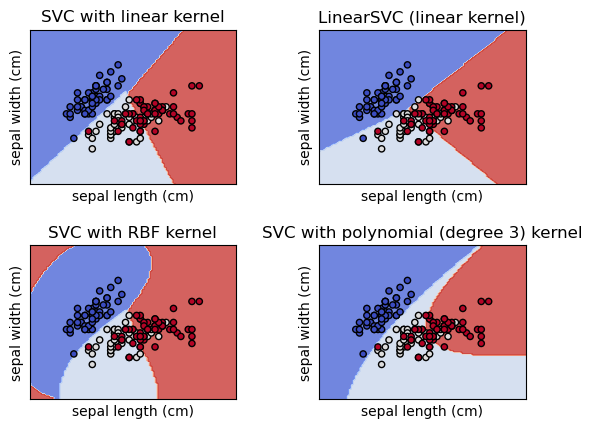

In [7]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
#Usage of various kernel and how they give separate 
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Load a sample dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'SVM': SVC(kernel='rbf'),
    'k-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Display results
for name, metrics in results.items():
    print(f"{name} - Accuracy: {metrics['Accuracy']:.2f}, F1 Score: {metrics['F1 Score']:.2f}")

SVM - Accuracy: 1.00, F1 Score: 1.00
k-NN - Accuracy: 1.00, F1 Score: 1.00
Random Forest - Accuracy: 1.00, F1 Score: 1.00
Logistic Regression - Accuracy: 1.00, F1 Score: 1.00
